# Sales Performance Analysis
In order to comprehend sales trends, consumer behavior, and product performance, this project uses exploratory data analysis (EDA) on retail sales transaction data. Finding trends in revenue, quantity sold, and customer segments is the main goal.

## Problem Statement
Large volumes of transactional sales data are produced by businesses. The objective of this project is to assess product category performance, comprehend customer demographics, and spot trends in sales data over time. In order to replicate real-world data challenges, the analysis also includes handling missing values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/ASUS/Downloads/archive (2)/retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Dataset Overview
The dataset contains transaction-level sales data, including customer demographics,
product categories, pricing, and total sales amount.

In [3]:
df.shape

(1000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## Data Quality Check
The dataset was checked for missing values to identify data cleaning requirements.

In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

The dataset contained no missing values, demonstrating the cleanliness and organization of the data. As a result, the analysis could move forward without the need for further imputation or row removal.

## Datetime Conversion
The date column was converted to datetime format to enable time-based analysis.

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

## Feature Engineering
Additional features were created to enhance analysis and validate revenue calculations.

In [7]:
df["Calculated Amount"] = df["Quantity"] * df["Price per Unit"]
df["Month"] = df["Date"].dt.month

## Exploratory Data Analysis (EDA)

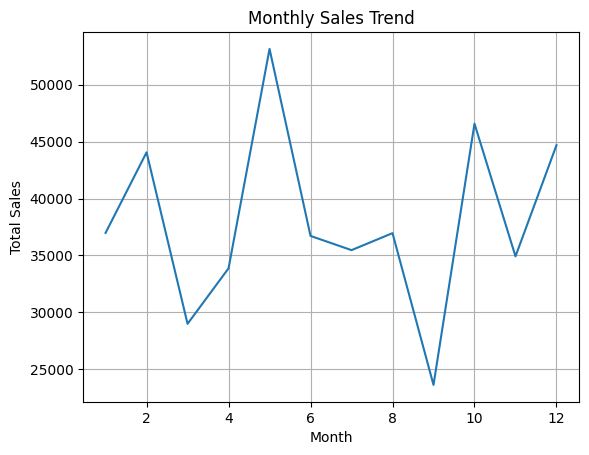

In [8]:
monthly_sales = df.groupby("Month")["Total Amount"].sum()

plt.figure()
monthly_sales.plot()
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()

The plot shows how total sales vary across different months, highlighting seasonal trends.

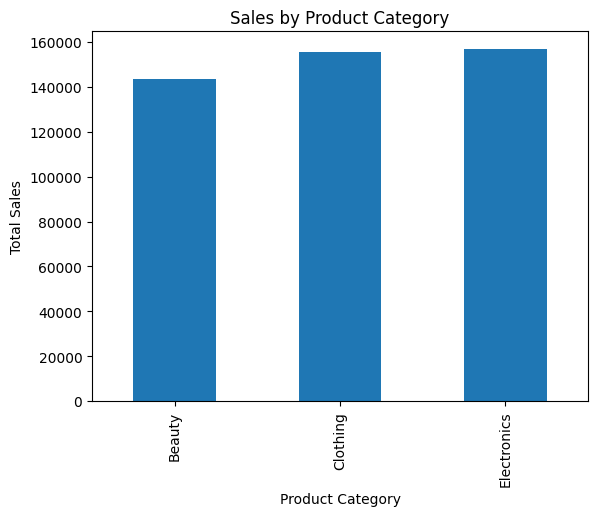

In [9]:
category_sales = df.groupby("Product Category")["Total Amount"].sum()

plt.figure()
category_sales.plot(kind="bar")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Sales by Product Category")
plt.show()

Different product categories contribute differently to overall sales revenue.

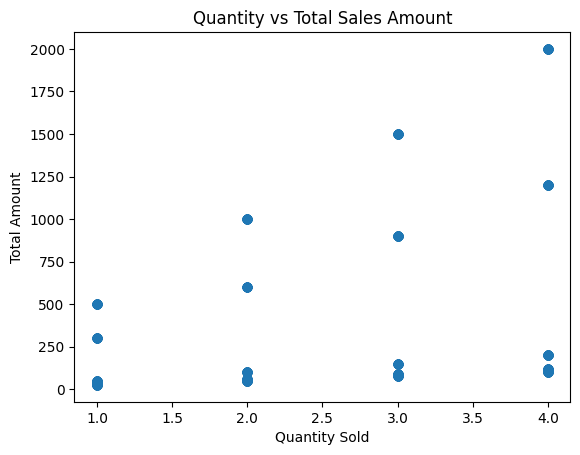

In [10]:
plt.figure()
plt.scatter(df["Quantity"], df["Total Amount"])
plt.xlabel("Quantity Sold")
plt.ylabel("Total Amount")
plt.title("Quantity vs Total Sales Amount")
plt.show()

Higher quantities sold generally lead to increased revenue, though pricing variations exist.

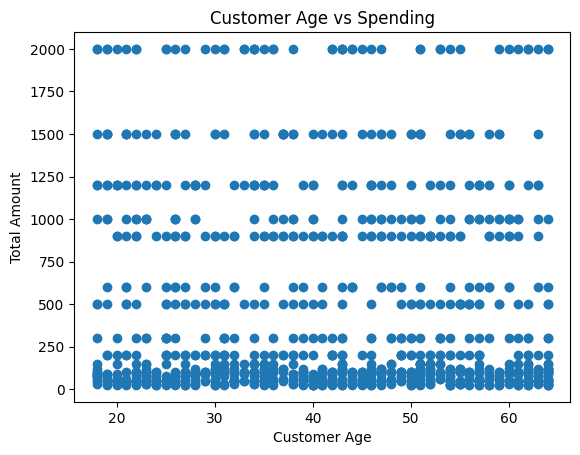

In [11]:
plt.figure()
plt.scatter(df["Age"], df["Total Amount"])
plt.xlabel("Customer Age")
plt.ylabel("Total Amount")
plt.title("Customer Age vs Spending")
plt.show()

Customer spending varies across age groups, indicating differences in purchasing behavior.

In [13]:
df[["Quantity", "Price per Unit", "Total Amount"]].corr()

,Quantity,Price per Unit,Total Amount
Quantity,1.000000,0.017501,0.373707
Price per Unit,0.017501,1.000000,0.851925
Total Amount,0.373707,0.851925,1.000000


Quantity and price both show a positive relationship with total sales amount.

## Limitations
- The dataset represents a limited number of transactions
- Some customer attributes may be incomplete
- Analysis is exploratory and not predictive

## Conclusion
Key sales trends across time, product categories, and customer demographics are highlighted in the analysis. Finding important business insights about revenue generation and customer behavior was made possible by handling missing values and conducting exploratory analysis.